In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from timeit import timeit
import sys
import datetime

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)
arr = df.values

In [3]:
#before handling
print("Pandas %d Bytes " % (sys.getsizeof(df)))
print("Numpy %d Bytes " % (sys.getsizeof(arr)))

Pandas 1064172247 Bytes 
Numpy 112 Bytes 


In [4]:
arr = arr[arr[:,2]!='?']
dt=arr[:,0] + np.array([' ']*len(arr)) + arr[:,1]
dt = pd.to_datetime(dt)   
arr[:,0] = dt.date
arr[:,1] = dt.time

for i in range(2,arr.shape[1]):
    arr[:,i] = arr[:,i].astype(float)
    

In [5]:
df.rename(columns={'Date':'DateTime'}, inplace=True)
df.drop(columns='Time',inplace=True)
df.drop(index=df[df.Sub_metering_3.isnull()].index, inplace=True)
df['DateTime']=dt
for c in df.columns[1:]:
    df[c]=df[c].astype(float)

In [6]:
#after handling
print("Pandas %d Bytes " % (sys.getsizeof(df)))
print("Numpy %d Bytes " % (sys.getsizeof(arr)))

Pandas 147548184 Bytes 
Numpy 147548272 Bytes 


In [7]:
size = [10**i for i in range(1,7)]
ticks = [str(s) for s in size]

In [8]:
def compare(s, t1, t2, name):
    sns.set(font_scale=1.5)
    font = {'weight' : 'bold',
            'size'   : 10}
    plt.rc('font', **font)
    plt.plot (s, t1)
    plt.plot(s, t2)
    plt.yscale('log')
    plt.xticks(rotation=30)  
    plt.title(name)
    plt.legend(['pandas','numpy'])
    plt.ylabel('time(s)')
    plt.xlabel('number of records')
    return plt.show()

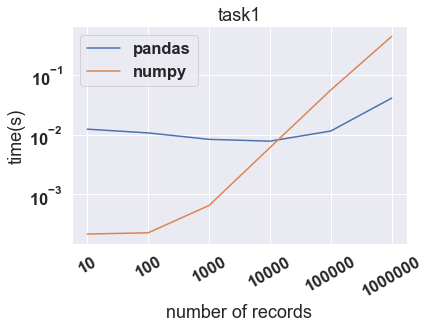

In [9]:
#task1
time1 = []
time2 = []
for s in size:
    d = df[0:s]
    a = arr[0:s,:]
    time1.append(timeit('d[d.Global_active_power>5]',number=10, globals=globals()))
    time2.append(timeit('a[a[:,2]>5]', number=10, globals=globals()))
    
compare(ticks, time1,time2, "task1")

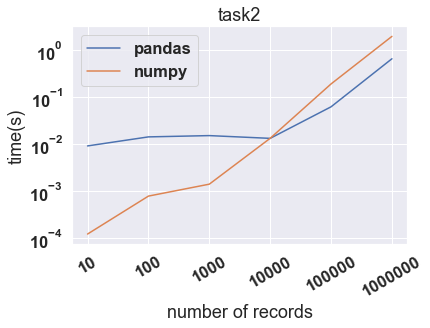

In [10]:
#task2
time1 = []
time2 = []
for s in size:
    d = df[0:s]
    a = arr[0:s,:]
    time1.append(timeit('d[d.Voltage>235]',number=10, globals=globals()))
    time2.append(timeit('a[a[:,4]>235]', number=10, globals=globals()))
    
compare(ticks, time1,time2, "task2")

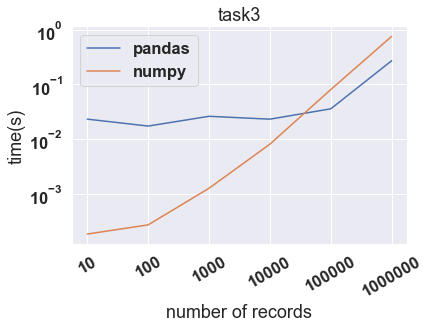

In [11]:
#task3
time1 = []
time2 = []
for s in size:
    d = df[0:s]
    a = arr[0:s,:]
    time1.append(timeit('d[(d.Global_intensity <= 20)&(d.Global_intensity >= 19)&(d.Sub_metering_2>d.Sub_metering_3)]',number=10, globals=globals()))
    time2.append(timeit('a[np.where((a[:,5]>=19)*(a[:,6]<=20)*(a[:,7]>a[:,8]))]', number=10, globals=globals()))
    
compare(ticks, time1,time2, "task3")

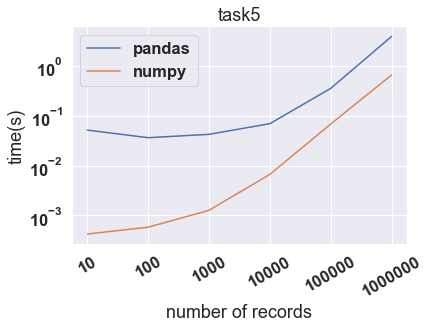

In [12]:
#task5
time1 = []
time2 = []
for s in size:
    d = df[0:s]
    a = arr[0:s,:]
    test1='''
frame = d.loc[(d.DateTime.dt.time>datetime.time(18))&
                       (d.Global_active_power>6)&
                       (d.Sub_metering_2>=d.Sub_metering_1)&
                       (d.Sub_metering_2>=d.Sub_metering_3)].reset_index(drop=True)
booleans = [True if ((i+1)%3==0 and (i+1)<len(frame.index)/2) or 
                    ((i+1)%4==0 and (i+1)>=len(frame.index)/2) else False for i in frame.index]
frame[booleans]
    '''

    test2='''
frame2 = a[(a[:,1]>datetime.time(18))&
              (a[:,2]>6.)&
              (a[:,7]>=a[:,6])&
              (a[:,7]>=a[:,8])]
booleans = [True if ((i+1)%3==0 and (i+1)<len(frame2)/2) or 
            ((i+1)%4==0 and (i+1)>=len(frame2)/2) else False for i in range(len(frame2))]
frame2[booleans]
    '''
    time1.append(timeit(test1,number=10, globals=globals()))
    time2.append(timeit(test2, number=10, globals=globals()))
    
compare(ticks, time1,time2, "task5")

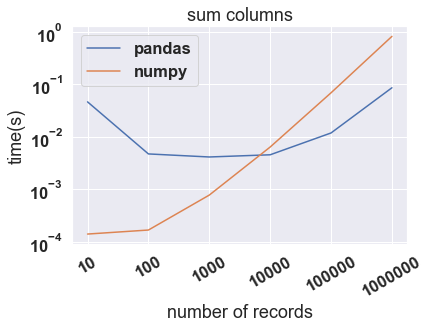

In [13]:
#sum some columns
time1 = []
time2 = []
for s in size:
    d = df[0:s]
    a = arr[0:s,:]
    time1.append(timeit('d.Sub_metering_1+d.Sub_metering_2+d.Sub_metering_1',number=10, globals=globals()))
    time2.append(timeit('a[:,6]+a[:,7]+a[:,8]', number=10, globals=globals()))
    
compare(ticks, time1,time2, "sum columns")

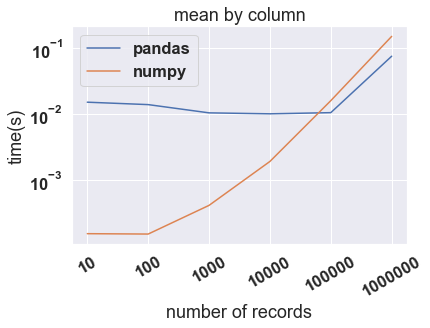

In [14]:
#mean by column(dataframe method)
time1 = []
time2 = []
for s in size:
    d = df[0:s]
    a = arr[0:s,:]
    time1.append(timeit('d[[\'Voltage\']].mean()',number=10, globals=globals()))
    time2.append(timeit('np.mean(a[:,4])', number=10, globals=globals()))
    
compare(ticks, time1,time2, "mean by column")

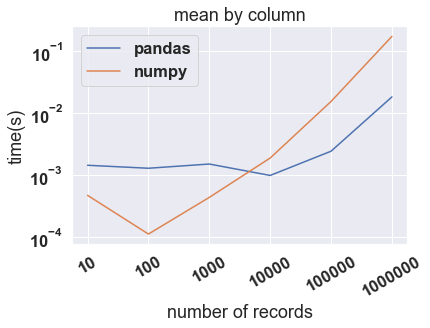

In [15]:
#mean by column(series method)
time1 = []
time2 = []
for s in size:
    d = df[0:s]
    a = arr[0:s,:]
    time1.append(timeit('d.Voltage.mean()',number=10, globals=globals()))
    time2.append(timeit('np.mean(a[:,4])', number=10, globals=globals()))
    
compare(ticks, time1,time2, "mean by column")